**Kaggle Cоревнование**

Прогнозирование цен на услуги репетиторов

In [2]:
import zipfile # импорт библиотеки для работы с архивом
# Импорт стандартных библиотек для обработки файлов и строк
import string   # Для работы со строковыми утилитами
import re       # Для работы с регулярными выражениями
from io import BytesIO  # Для работы с бинарными потоками в памяти (например, файлы Excel)

# Библиотеки для анализа данных
import pandas as pd  # Для работы с данными в формате DataFrame
import numpy as np   # Для числовых вычислений и работы с массивами


In [3]:
# Библиотеки для визуализации данных
import matplotlib.pyplot as plt  # Для создания статичных, анимированных и интерактивных визуализаций
import seaborn as sns           # Для статистической визуализации данных на основе matplotlib

# Библиотеки для обработки текста и NLP
import nltk                     # Инструментарий для обработки естественного языка
from nltk.corpus import stopwords  # Для доступа к списку стоп-слов на разных языках
from nltk.stem.snowball import SnowballStemmer  # Для стемминга слов в обработке текста
from sklearn.feature_extraction.text import TfidfVectorizer  # Для преобразования текста в TF-IDF признаки
from sklearn.feature_extraction.text import HashingVectorizer  # Для извлечения признаков текста на основе хеширования

In [3]:
# Модели машинного обучения
from sklearn.linear_model import LogisticRegression  # Для логистической регрессии (классификация)
from sklearn.ensemble import RandomForestRegressor  # Для регрессии на основе случайного леса
from sklearn.neural_network import MLPRegressor     # Для регрессии на основе многослойного перцептрона
from xgboost import XGBRegressor                    # Для регрессии на основе градиентного бустинга

In [4]:
# Модели машинного обучения
from sklearn.linear_model import LogisticRegression  # Для логистической регрессии (классификация)
from sklearn.ensemble import RandomForestRegressor  # Для регрессии на основе случайного леса
from sklearn.neural_network import MLPRegressor     # Для регрессии на основе многослойного перцептрона
from xgboost import XGBRegressor                    # Для регрессии на основе градиентного бустинга


In [5]:
# Библиотеки для предобработки и выбора признаков в машинном обучении
from sklearn.preprocessing import LabelEncoder      # Для кодирования категориальных меток в числа
from sklearn.preprocessing import StandardScaler    # Для стандартизации признаков (среднее=0, дисперсия=1)
from sklearn.feature_selection import SelectFromModel  # Для выбора признаков на основе важности модели


In [6]:
# Библиотеки для оценки моделей и кросс-валидации
from sklearn.model_selection import KFold           # Для k-кратной кросс-валидации
from sklearn.metrics import r2_score                # Для вычисления коэффициента детерминации (R²) для регрессии

In [8]:
zip_path = "/content/sample_data/tutors-lessons-prices-prediction (1).zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for info in zip_ref.infolist():
        print(f"Файл: {info.filename}, Размер: {info.file_size} байт, Сжатый: {info.compress_size} байт")

Файл: sample_submit.csv, Размер: 34409 байт, Сжатый: 17576 байт
Файл: test.xlsx, Размер: 724591 байт, Сжатый: 721877 байт
Файл: train.xlsx, Размер: 1944149 байт, Сжатый: 1941703 байт


In [9]:
datasets = {}  # Словарь для хранения датафреймов

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for info in zip_ref.infolist():
        file_name = info.filename
        df_name = file_name.split('.')[0]  # Используем имя файла без расширения как ключ

        # Открываем файл без распаковки на диск
        with zip_ref.open(file_name) as file:
            if file_name.endswith(".csv"):
                df = pd.read_csv(file)
            elif file_name.endswith(".xlsx"):
                df = pd.read_excel(BytesIO(file.read()), engine="openpyxl")
            else:
                continue  # Пропускаем ненужные файлы

            datasets[df_name] = df  # Сохраняем датафрейм в словарь
            print(f"Датафрейм '{df_name}' ({file_name}) загружен, {df.shape}")

Датафрейм 'sample_submit' (sample_submit.csv) загружен, (1516, 2)
Датафрейм 'test' (test.xlsx) загружен, (1516, 27)
Датафрейм 'train' (train.xlsx) загружен, (4548, 28)


# **EDA**  **Exploratory Data Analysis**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4548 entries, 0 to 4547
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   предмет           4548 non-null   object 
 1   ФИО               4548 non-null   object 
 2   tutor_head_tags   4548 non-null   object 
 3   tutor_rating      3959 non-null   float64
 4   tutor_reviews     4548 non-null   int64  
 5   description       4547 non-null   object 
 6   experience_desc   2171 non-null   object 
 7   Education_1       4548 non-null   object 
 8   Desc_Education_1  4472 non-null   object 
 9   Education_2       781 non-null    object 
 10  Desc_Education_2  777 non-null    object 
 11  Education_3       106 non-null    object 
 12  Desc_Education_3  105 non-null    object 
 13  Education_4       16 non-null     object 
 14  Desc_Education_4  16 non-null     object 
 15  Ученая степень 1  76 non-null     object 
 16  Ученое звание 1   35 non-null     object 
 17  

In [ ]:
train_data.describe()

,tutor_rating,tutor_reviews,mean_price
count,3959.000000,4548.000000,4548.000000
mean,1.895933,2.989006,16.197949
std,2.280103,8.516939,10.485108
min,0.000000,0.000000,0.041667
25%,0.000000,0.000000,10.000000
50%,0.000000,0.000000,15.000000
75%,4.000000,2.000000,20.888889
max,5.000000,152.000000,100.000000


In [ ]:
train_data.columns

Index(['предмет', 'ФИО', 'tutor_head_tags', 'tutor_rating', 'tutor_reviews',
       'description', 'experience_desc', 'Education_1', 'Desc_Education_1',
       'Education_2', 'Desc_Education_2', 'Education_3', 'Desc_Education_3',
       'Education_4', 'Desc_Education_4', 'Ученая степень 1',
       'Ученое звание 1', 'status', 'experience', 'Desc_Education_5',
       'Desc_Education_6', 'Education_5', 'Education_6', 'Ученая степень 2',
       'Ученое звание 2', 'categories', 'mean_price'],
      dtype='object')

In [10]:
# Получение списков столбцов для каждого набора данных
train_columns = set(datasets['train'].columns)
test_columns = set(datasets['test'].columns)
submit_columns = set(datasets['sample_submit'].columns)


In [23]:

# Сравнение столбцов между наборами данных
print("Столбцы, присутствующие в обучающем наборе, но отсутствующие в тестовом:", train_columns - test_columns)
print("Столбцы, присутствующие в тестовом наборе, но отсутствующие в обучающем:", test_columns - train_columns)
print("Столбцы, присутствующие в обучающем наборе, но отсутствующие в примере отправки:", train_columns - submit_columns)

Столбцы, присутствующие в обучающем наборе, но отсутствующие в тестовом: {'mean_price'}
Столбцы, присутствующие в тестовом наборе, но отсутствующие в обучающем: set()
Столбцы, присутствующие в обучающем наборе, но отсутствующие в примере отправки: {'Desc_Education_5', 'Ученое звание 2', 'categories', 'Education_3', 'Desc_Education_1', 'Education_2', 'Desc_Education_3', 'Desc_Education_2', 'status', 'experience_desc', 'предмет', 'Ученая степень 2', 'Desc_Education_4', 'Education_1', 'Ученая степень 1', 'Desc_Education_6', 'tutor_reviews', 'tutor_rating', 'ФИО', 'tutor_head_tags', 'Unnamed: 0', 'Ученое звание 1', 'Education_5', 'Education_6', 'description', 'experience', 'Education_4'}


In [11]:
# Проверка дубликатов в обучающем наборе данных
duplicates = datasets['train'].duplicated().sum()  # Подсчёт количества дубликатов
print(f"Количество дубликатов в наборе данных 'train': {duplicates}")

Количество дубликатов в наборе данных 'train': 0


In [12]:
duplicates = datasets["test"].duplicated().sum()  # Считаем количество дубликатов
print(f"Количество дубликатов в датафрейме 'test': {duplicates}")

Количество дубликатов в датафрейме 'test': 0


In [13]:
cols_to_drop = ["ФИО", "Unnamed: 0", "Ученая степень 2", "Ученое звание 2"]

datasets["train"].drop(columns=cols_to_drop, errors="ignore", inplace=True)
datasets["test"].drop(columns=cols_to_drop, errors="ignore", inplace=True)

In [14]:
import pandas as pd

# Список столбцов, которые нужно удалить (присутствуют в train, но отсутствуют в submission)
cols_to_drop = [
    'Education_2', 'Desc_Education_4', 'Education_3', 'status', 'description',
    'Ученая степень 1', 'Desc_Education_2', 'tutor_rating', 'предмет', 'Education_1',
    'Desc_Education_6', 'Ученая степень 2', 'Desc_Education_5', 'tutor_head_tags',
    'Desc_Education_1', 'experience', 'experience_desc', 'Desc_Education_3', 'Education_5',
    'tutor_reviews', 'categories', 'Education_4', 'ФИО', 'Ученое звание 1',
    'Ученое звание 2', 'Education_6'
]

# Функция для уравнивания столбцов
def align_columns(train_data, test_data, columns_to_drop):
    """
    Удаляет указанные столбцы из обучающего и тестового наборов данных.

    Parameters:
        train_data (pd.DataFrame): Обучающий набор данных
        test_data (pd.DataFrame): Тестовый набор данных
        columns_to_drop (list): Список столбцов для удаления

    Returns:
        tuple: Обновленные train_data и test_data
    """
    # Удаление столбцов из обучающего набора
    train_data = train_data.drop(columns=columns_to_drop, errors='ignore')

    # Удаление столбцов из тестового набора
    test_data = test_data.drop(columns=columns_to_drop, errors='ignore')

    # Проверка оставшихся столбцов
    print("Train columns after dropping:", train_data.columns.tolist())
    print("Test columns after dropping:", test_data.columns.tolist())

    return train_data, test_data

# Пример использования
# Загрузка данных (замените пути на актуальные)
# train_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')

# Вызов функции
# train_data, test_data = align_columns(train_data, test_data, cols_to_drop)

# Сохранение обработанных данных (опционально)
# train_data.to_csv('train_aligned.csv', index=False)
# test_data.to_csv('test_aligned.csv', index=False)

In [ ]:
print("Уникальные значения в train:", datasets["train"]["experience"].unique())
datasets["train"]["experience"].dtype

Уникальные значения в train: [' 31 год ' ' 8 лет ' ' 11 лет ' ' 5 лет ' ' 19 лет ' ' 7 лет ' ' 27 лет '
 ' 9 лет ' ' 38 лет ' ' 28 лет ' ' 17 лет ' ' 6 лет ' ' 13 лет '
 ' 45 лет ' ' 4 года ' ' 3 года ' ' 10 лет ' ' 2 года ' ' 14 лет '
 ' 20 лет ' ' 18 лет ' ' 32 года ' ' 16 лет ' ' 21 год ' ' 15 лет '
 ' 12 лет ' ' 1 год ' ' 24 года ' ' 29 лет ' ' 22 года ' ' 39 лет '
 ' 23 года ' ' 25 лет ' ' 34 года ' nan ' 33 года ' ' 43 года ' ' 36 лет '
 ' 40 лет ' ' 26 лет ' ' 41 год ' ' 30 лет ' ' 42 года ' ' 37 лет '
 ' 35 лет ' ' 47 лет ' ' 44 года ' ' 53 года ' ' 55 лет ' ' 68 лет '
 ' 48 лет ' ' 52 года ' ' 50 лет ' ' 46 лет ' ' 51 год ' ' 54 года ']


dtype('O')

# Обработка пропущенных значений

In [21]:
nan_counts = datasets["train"].isna().sum()  # Считаем количество NaN в каждой колонке
nan_counts = nan_counts[nan_counts > 0]  # Оставляем только колонки с пропусками

for col, count in nan_counts.items():
    print(f"В колонке '{col}' пропусков: {count}")

В колонке 'tutor_rating' пропусков: 589
В колонке 'description' пропусков: 1
В колонке 'experience_desc' пропусков: 2377
В колонке 'Desc_Education_1' пропусков: 76
В колонке 'Education_2' пропусков: 3767
В колонке 'Desc_Education_2' пропусков: 3771
В колонке 'Education_3' пропусков: 4442
В колонке 'Desc_Education_3' пропусков: 4443
В колонке 'Education_4' пропусков: 4532
В колонке 'Desc_Education_4' пропусков: 4532
В колонке 'Ученая степень 1' пропусков: 4472
В колонке 'Ученое звание 1' пропусков: 4513
В колонке 'status' пропусков: 13
В колонке 'experience' пропусков: 25
В колонке 'Desc_Education_5' пропусков: 4545
В колонке 'Desc_Education_6' пропусков: 4547
В колонке 'Education_5' пропусков: 4545
В колонке 'Education_6' пропусков: 4547


In [22]:
# Задаем значение n (например, 50% пропусков)
n = 50

# Рассчитываем долю пропусков для каждого столбца
missing_percentage = datasets["train"].isna().mean() * 100  # Получаем процент пропусков для каждого столбца

# Рассчитываем количество непустых значений в каждом столбце
non_missing_counts = datasets["train"].notna().sum()

# Выбираем колонки, где доля пропусков >= n
columns_with_missing = missing_percentage[missing_percentage >= n]

if len(columns_with_missing) > 0:
    print(f"Колонки, где доля пустых значений >= {n}%:")

    # Выводим заголовок с выравниванием
    print(f"{'Строка'.ljust(25)} {'% пустых'.ljust(15)} {'Количество не пустых значений'}")

    # Выводим данные с выравниванием
    for col in columns_with_missing.index:
        print(f"{col.ljust(25)} {missing_percentage[col]:<15.6f} {non_missing_counts[col]}")
else:
    print(f"Нет колонок, где доля пустых строк >= {n}%.")

Колонки, где доля пустых значений >= 50%:
Строка                    % пустых        Количество не пустых значений
experience_desc           52.264732       2171
Education_2               82.827617       781
Desc_Education_2          82.915567       777
Education_3               97.669305       106
Desc_Education_3          97.691293       105
Education_4               99.648197       16
Desc_Education_4          99.648197       16
Ученая степень 1          98.328936       76
Ученое звание 1           99.230431       35
Desc_Education_5          99.934037       3
Desc_Education_6          99.978012       1
Education_5               99.934037       3
Education_6               99.978012       1


In [23]:
# Гиперпараметры
del_nan = 1  # 1 для удаления, 0 для оставления
not_nun_qty = 3  # минимальное количество непустых значений

if del_nan == 0:
    # Получаем количество непустых значений в каждом столбце
    non_missing_counts_train = datasets["train"].notna().sum()
    non_missing_counts_test = datasets["test"].notna().sum()

    # Получаем столбцы, где количество непустых значений <= not_nun_qty
    columns_to_remove_train = non_missing_counts_train[non_missing_counts_train <= not_nun_qty].index
    columns_to_remove_test = non_missing_counts_test[non_missing_counts_test <= not_nun_qty].index

    # Удаляем эти столбцы из датафреймов
    datasets["train"] = dfs["train"].drop(columns=columns_to_remove_train)
    datasets["test"] = dfs["test"].drop(columns=columns_to_remove_test)

    print(f"Удалены столбцы с непустыми значениями <= {not_nun_qty}:")
    print("В train:", columns_to_remove_train)
    print("В test:", columns_to_remove_test)
else:
    print("Никакие столбцы не удалены.")


Никакие столбцы не удалены.


# Data Engineering: text preprocessing

### Преобразование столбца Education_2

In [38]:
for df in [datasets["train"], datasets["test"]]:
    df["Education_2"] = df["Education_2"].apply(lambda x: "unknown" if pd.isna(x) else ' '.join(x) if isinstance(x, list) else str(x))

In [24]:
# Преобразование текстовых столбцов в нижний регистр
for col in datasets["train"].select_dtypes("object").columns:
    datasets["train"][col] = datasets["train"][col].str.lower()

for col in datasets["test"].select_dtypes("object").columns:
    datasets["test"][col] = datasets["test"][col].str.lower()

In [25]:
# Функция для обработки текста и подсчета удаленных символов
def preprocess_text(text):
    if isinstance(text, str):
        original_length = len(text)  # Длина исходного текста
        text = text.lower()  # Преобразуем в нижний регистр
        text_cleaned = text.translate(str.maketrans("", "", string.punctuation))  # Убираем пунктуацию
        removed_chars = original_length - len(text_cleaned)  # Подсчет удаленных символов
        return text_cleaned, removed_chars
    return text, 0  # Если не строка, ничего не меняем

# Функция для обработки всего датафрейма
def clean_dataframe(df):
    char_removed_total = 0
    for col in df.select_dtypes(include=["object"]):  # Обрабатываем только текстовые колонки
        processed = df[col].apply(preprocess_text)
        df[col] = processed.apply(lambda x: x[0])  # Оставляем только очищенный текст
        char_removed_total += processed.apply(lambda x: x[1]).sum()  # Суммируем удаленные символы
    return char_removed_total

# Обрабатываем train и test
char_removed_train = clean_dataframe(datasets["train"])
char_removed_test = clean_dataframe(datasets["test"])

# Выводим количество удаленных символов
print(f"В datasets['train'] удалено {char_removed_train} символов пунктуации.")
print(f"В datasets['test'] удалено {char_removed_test} символов пунктуации.")

В datasets['train'] удалено 229437 символов пунктуации.
В datasets['test'] удалено 79699 символов пунктуации.


Удаление пробелов - двойные и тройные пробелы в начале и конце строки

In [26]:
import re  # Импортируем библиотеку для работы с регулярными выражениями

# Функция для удаления лишних пробелов из текста
def remove_extra_spaces(text):
    """
    Обрабатывает текстовую строку, убирая лишние пробелы (например, множественные пробелы или пробелы в начале/конце).
    Если входные данные не являются строкой, возвращает их без изменений.

    Parameters:
        text: Входные данные (обычно строка, но может быть и другой тип, например, число или None)

    Returns:
        tuple: (очищенный текст, количество удаленных символов)
    """
    if isinstance(text, str):  # Проверяем, является ли входной объект строкой
        original_length = len(text)  # Сохраняем длину исходной строки (для подсчета удаленных символов)
        text = re.sub(r'\s+', ' ', text).strip()  # Убираем лишние пробелы:
                                                  # re.sub(r'\s+', ' ', text) заменяет все последовательности пробелов (включая табуляцию, переносы строк) на один пробел
                                                  # .strip() убирает пробелы в начале и конце строки
        removed_chars = original_length - len(text)  # Считаем, сколько символов было удалено (разница в длине)
        return text, removed_chars  # Возвращаем очищенную строку и количество удаленных символов
    return text, 0  # Если входные данные не строка (например, число или NaN), возвращаем их без изменений и 0 удаленных символов

# Функция для обработки всех текстовых столбцов в датафрейме
def clean_spaces_dataframe(df):
    """
    Применяет функцию remove_extra_spaces ко всем текстовым столбцам датафрейма.
    Подсчитывает общее количество удаленных пробельных символов.

    Parameters:
        df (pd.DataFrame): Датафрейм (например, datasets["train"] или datasets["test"])

    Returns:
        int: Общее количество удаленных пробельных символов
    """
    char_removed_total = 0  # Инициализируем счетчик удаленных символов
    # Выбираем только столбцы с типом "object" (обычно это строки в pandas)
    for col in df.select_dtypes(include=["object"]):
        # Применяем функцию remove_extra_spaces к каждому значению в столбце
        # Результатом будет столбец, где каждое значение — кортеж (очищенный текст, количество удаленных символов)
        processed = df[col].apply(remove_extra_spaces)

        # Обновляем столбец, оставляя только очищенный текст (берем первый элемент кортежа)
        df[col] = processed.apply(lambda x: x[0])

        # Суммируем количество удаленных символов для этого столбца (берем второй элемент кортежа)
        char_removed_total += processed.apply(lambda x: x[1]).sum()

    return char_removed_total  # Возвращаем общее количество удаленных символов

# Обрабатываем обучающий и тестовый наборы данных
# datasets["train"] — это обучающий датафрейм, datasets["test"] — тестовый датафрейм
spaces_removed_train = clean_spaces_dataframe(datasets["train"])  # Обрабатываем train
spaces_removed_test = clean_spaces_dataframe(datasets["test"])    # Обрабатываем test

# Выводим результаты: сколько пробельных символов было удалено в каждом наборе
print(f"В datasets['train'] удалено {spaces_removed_train} пробельных символов.")
print(f"В datasets['test'] удалено {spaces_removed_test} пробельных символов.")

В datasets['train'] удалено 157093 пробельных символов.
В datasets['test'] удалено 54610 пробельных символов.


In [27]:
# Функция для замены пробелов на NaN (заменяет ячейки, содержащие только пробелы или пустые строки)
def replace_spaces_with_nan(df):
    return df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

# Применяем к датафреймам
datasets["train"] = replace_spaces_with_nan(datasets["train"])
datasets["test"] = replace_spaces_with_nan(datasets["test"])

# Подсчитываем количество NaN в каждом датафрейме
train_nan_count = datasets["train"].isna().sum().sum()  # Общее количество NaN в train
test_nan_count = datasets["test"].isna().sum().sum()    # Общее количество NaN в test

# Выводим результаты
print(f"Количество замененных значений в train: {train_nan_count}")
print(f"Количество замененных значений в test: {test_nan_count}")

Количество замененных значений в train: 55744
Количество замененных значений в test: 18313


<ipython-input-27-98ea3542772b>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)


In [28]:
# Cлова во всех текстовых колонках приводим к грамматической основе (stemmer)
# Создаем стеммер для русского языка
stemmer = SnowballStemmer("russian")

# Функция для применения стемминга к строкам текста
def stem_text(text):
    if isinstance(text, str):
        # Разбиваем строку на слова, применяем стемминг и соединяем их обратно
        return " ".join([stemmer.stem(word) for word in text.split()])
    return text  # Если это не строка, возвращаем без изменений

# Применяем стемминг ко всем текстовым колонкам в обоих датасетах
def apply_stemming_to_dataframe(df):
    for col in df.select_dtypes(include=["object"]):  # Обрабатываем только текстовые колонки
        df[col] = df[col].apply(stem_text)

# Применяем стемминг к датасетам
apply_stemming_to_dataframe(datasets["train"])
apply_stemming_to_dataframe(datasets["test"])

Определение длины строк в каждом столбце

In [29]:
# Функция для подсчета количества слов в строке
def word_count(text):
    if isinstance(text, str):
        return len(text.split())  # Разбиваем строку по пробелам и считаем количество слов
    return 0  # Для нестроковых значений возвращаем 0

# Проходим по всем столбцам в датафрейме
for column in datasets["train"].columns:
    # Применяем функцию word_count к каждому значению в столбце
    word_counts = datasets["train"][column].apply(word_count)

    # Вычисляем минимум, максимум и среднее
    min_words = word_counts.min()
    max_words = word_counts.max()
    mean_words = word_counts.mean()

    # Выводим результат для каждого столбца
    print(f"Столбец: '{column}'")
    print(f"  Минимум: {min_words} слов")
    print(f"  Максимум: {max_words} слов")
    print(f"  Среднее: {mean_words:.2f} слов")
    print("-" * 50)


Столбец: 'предмет'
  Минимум: 1 слов
  Максимум: 1 слов
  Среднее: 1.00 слов
--------------------------------------------------
Столбец: 'tutor_head_tags'
  Минимум: 0 слов
  Максимум: 41 слов
  Среднее: 8.06 слов
--------------------------------------------------
Столбец: 'tutor_rating'
  Минимум: 0 слов
  Максимум: 0 слов
  Среднее: 0.00 слов
--------------------------------------------------
Столбец: 'tutor_reviews'
  Минимум: 0 слов
  Максимум: 0 слов
  Среднее: 0.00 слов
--------------------------------------------------
Столбец: 'description'
  Минимум: 0 слов
  Максимум: 1187 слов
  Среднее: 67.60 слов
--------------------------------------------------
Столбец: 'experience_desc'
  Минимум: 0 слов
  Максимум: 363 слов
  Среднее: 10.59 слов
--------------------------------------------------
Столбец: 'Education_1'
  Минимум: 1 слов
  Максимум: 21 слов
  Среднее: 4.50 слов
--------------------------------------------------
Столбец: 'Desc_Education_1'
  Минимум: 0 слов
  Максимум: 43

6 уникальных значений в 'tutor_rating' : [ 5. 4. 0. nan 3. 2. 1.]
Заменим nan на 0

Заменим все NAN в текстовых колонках на Unknown

In [30]:
# Заполняем пропущенные значения в текстовых колонках
for key in ["train", "test"]:
    datasets[key] = datasets[key].apply(lambda col: col.fillna("unknown") if col.dtype == "object" else col)

# Проверяем, остались ли NaN в текстовых колонках
for key in ["train", "test"]:
    text_cols = datasets[key].select_dtypes(include=["object"]).columns
    nan_check = datasets[key][text_cols].isna().sum()  # Проверка на NaN
    print(f"NaN в текстовых колонках для {key}:")
    #print(nan_check)
    if nan_check.sum() > 0:
        print(f"Остались NaN в текстовых колонках в {key}.")
    else:
        print(f"Нет NaN в текстовых колонках в {key}.")

NaN в текстовых колонках для train:
Нет NaN в текстовых колонках в train.
NaN в текстовых колонках для test:
Нет NaN в текстовых колонках в test.


Увеличение датасета за счет создания дополнительных данных

In [31]:
unique_values = datasets["train"]["Desc_Education_1"].unique()
print(unique_values[:10])  # Вывод первых 100 элементов

['год окончан 1990 факультет механикоматематическ факультет специальн прикладн математик'
 'год окончан 2017 факультет факультет прикладн математик и информатик специальн прикладн математик и информатик'
 'год окончан 2008 факультет математическ специальн математик и информатик квалификац учител математик и информатик'
 'год окончан 2021 факультет физическ факультет специальн физик'
 'год окончан 2005 факультет энергетическ специальн электроснабжен промышлен предприят квалификац магистр электротехник'
 'год окончан 2019 факультет факультет энергетическ машиностроен специальн поршнев двигател'
 'год окончан 1996 факультет механикоматематическ факультет специальн математик'
 'год окончан 2015 факультет экономическ факультет специальн экономик предприят'
 'год окончан 1981 факультет математическ специальн прикладн математик квалификац математик'
 'год окончан 1994 факультет физикоматематическ факультет специальн учител математик и информатик']


Cоздание новой колонки с числами "год окончания вуза"

In [32]:
def extract_graduation_year(text):
    if isinstance(text, str):  # Проверяем, что текст является строкой
        match = re.search(r"год окончан\s*(\d{4})", text)
        if match:
            return int(match.group(1))  # Возвращаем найденный год
    return 0  # Если нет совпадений, возвращаем 0

# Применяем функцию к нужным столбцам
datasets["train"]["год окончания"] = datasets["train"]["Desc_Education_1"].apply(extract_graduation_year)
datasets["test"]["год окончания"] = datasets["test"]["Desc_Education_1"].apply(extract_graduation_year)


In [33]:
def extract_faculty(text):
    if isinstance(text, str):  # Проверяем, что текст является строкой
        match = re.search(r"факультет\s*(.*?)(?=\bквалификац|\bспециальн|$)", text, re.IGNORECASE)
        if match:
            faculty = match.group(1).strip()
            return faculty if len(faculty) >= 4 else "unknown"  # Проверяем длину строки
    return "unknown"  # Если нет совпадений, возвращаем "unknown"

# Применяем функцию к нужным столбцам
datasets["train"]["факультет"] = datasets["train"]["Desc_Education_1"].apply(extract_faculty)
datasets["test"]["факультет"] = datasets["test"]["Desc_Education_1"].apply(extract_faculty)


In [34]:
# Количество уникальных значений
print("Количество уникальных значений:", datasets["train"]["факультет"].nunique())

# Сами уникальные значения
print("Уникальные значения:", datasets["train"]["факультет"].unique())

# Количество каждого уникального значения
print("Частота уникальных значений:")
print(datasets["train"]["факультет"].value_counts())


Количество уникальных значений: 1072
Уникальные значения: ['механикоматематическ факультет'
 'факультет прикладн математик и информатик' 'математическ' ...
 'лингвистическ факультет' 'факультет педагогик и методик начальн обучен'
 'факультет информацион сист и геотехнолог']
Частота уникальных значений:
факультет
unknown                              424
физикоматематическ факультет         249
физическ факультет                   181
физикоматематическ                   109
математическ факультет               105
                                    ... 
биологическ                            1
иктз                                   1
chemistry                              1
институт математик информатик          1
садоводств и ландшафтн архитектур      1
Name: count, Length: 1072, dtype: int64


Создание новой текстовой колонки "специальность"

In [35]:

def extract_specialty(text):
    if isinstance(text, str):  # Проверяем, что текст является строкой
        match = re.search(r"(квалификац|специальн)\s*(.*?)(?=\bдиплом|$)", text, re.IGNORECASE)
        if match:
            specialty = match.group(2).strip()
            return specialty if len(specialty) >= 4 else "unknown"  # Проверяем длину строки
    return "unknown"  # Если фраза не найдена, возвращаем "unknown"

# Применяем функцию к нужным столбцам
datasets["train"]["специальность"] = datasets["train"]["Desc_Education_1"].apply(extract_specialty)
datasets["test"]["специальность"] = datasets["test"]["Desc_Education_1"].apply(extract_specialty)

In [36]:
# Количество уникальных значений
print("Количество уникальных значений:", datasets["train"]["специальность"].nunique())

# Частота каждого уникального значения
print("Частота уникальных значений:")
print(datasets["train"]["специальность"].value_counts())

Количество уникальных значений: 1977
Частота уникальных значений:
специальность
математик                                                                                                    162
unknown                                                                                                      144
физик                                                                                                         79
прикладн математик и информатик                                                                               72
учител математик                                                                                              48
                                                                                                            ... 
учител математик квалификац перв квалификац                                                                    1
энергетическ машиностроен гидравлик квалификац бакалавр                                                        1
математик с допо

In [37]:
# Получаем 100 наиболее часто встречающихся значений и преобразуем в список
top_100_specialties = datasets["train"]["специальность"].value_counts().head(100).index.tolist()

# Выводим их
print(top_100_specialties)


['математик', 'unknown', 'физик', 'прикладн математик и информатик', 'учител математик', 'прикладн математик и информатик квалификац бакалавр', 'программн инженер квалификац бакалавр', 'прикладн математик', 'информатик и вычислительн техник квалификац бакалавр', 'экономик', 'учител математик и информатик', 'инженер', 'математик и информатик квалификац учител математик и информатик', 'прикладн информатик квалификац бакалавр', 'бакалавр', 'математик квалификац математик', 'фундаментальн информатик и информацион технолог квалификац бакалавр', 'математик квалификац учител математик', 'менеджмент', 'математик квалификац математик преподавател', 'программн инженер', 'прикладн математик и информатик квалификац студент', 'информатик и вычислительн техник', 'информатик квалификац учител информатик', 'физик бакалавр', 'программн инженер квалификац студент', 'математик и информатик', 'прикладн математик и физик', 'физик квалификац бакалавр', 'математик квалификац бакалавр', 'прикладн информатик к

In [38]:
# Выведение 100 наиболее часто встречающихся значений
datasets["train"]["специальность"].value_counts().head(100)

,count
специальность,
математик,162
unknown,144
физик,79
прикладн математик и информатик,72
учител математик,48
...,...
радиотехник,8
программн обеспечен вычислительн техник и автоматизирова сист квалификац инженер,8
анализ и управлен на основ дан квалификац магистрант,8


In [39]:
# Объединяем уникальные значения из обоих столбцов
all_specialties = pd.concat([datasets["train"]["специальность"], datasets["test"]["специальность"]])

# Считаем частоту уникальных значений
top_specialties = all_specialties.value_counts().head(10)

# Создаем колонку "специальность_range" для train и test
def assign_specialty_rank(text):
    if text in top_specialties.index:
        return top_specialties.index.get_loc(text) + 1  # Получаем ранг (индекс + 1)
    return 0  # Если значение не в топ-100, присваиваем 0

# Применяем функцию для обеих таблиц
datasets["train"]["специальность_range"] = datasets["train"]["специальность"].apply(assign_specialty_rank)
datasets["test"]["специальность_range"] = datasets["test"]["специальность"].apply(assign_specialty_rank)

# Выводим первые несколько строк для проверки
print(datasets["train"][["специальность", "специальность_range"]].head())
print(datasets["test"][["специальность", "специальность_range"]].head())

                                       специальность  специальность_range
0                                 прикладн математик                    8
1                    прикладн математик и информатик                    4
2  математик и информатик квалификац учител матем...                    0
3                                              физик                    3
4  электроснабжен промышлен предприят квалификац ...                    0
                                       специальность  специальность_range
0  математик квалификац квалификац математик преп...                    0
1                                 прикладн математик                    8
2        математик квалификац преподавател математик                    0
3                       бакалавр международн отношен                    0
4                                            unknown                    2


In [40]:
# объединение ячеек

def assign_specialty_code(text):
    if isinstance(text, str):  # Проверяем, что текст является строкой
        text = text.lower()  # Приводим текст к нижнему регистру для унификации
        if "учител физик и математик" in text or "учител математик" in text:
            return 1
        elif "прикладн математик и информатик" in text or "математик" in text  or "прикладн математик" in text:
            return 2
        elif "учител" in text:
            return 3
        elif "физик" in text:
            return 4
    return 0  # Если нет совпадений, ставим 0

# Применяем функцию к столбцам "специальность"
datasets["train"]["специальность_код"] = datasets["train"]["специальность"].apply(assign_specialty_code)
datasets["test"]["специальность_код"] = datasets["test"]["специальность"].apply(assign_specialty_code)

# Выводим количество уникальных значений
print("Количество уникальных значений в train:")
print(datasets["train"]["специальность_код"].value_counts())

print("Количество уникальных значений в test:")
print(datasets["test"]["специальность_код"].value_counts())

Количество уникальных значений в train:
специальность_код
0    2535
2    1056
4     430
1     377
3     150
Name: count, dtype: int64
Количество уникальных значений в test:
специальность_код
0    821
2    348
4    153
1    138
3     56
Name: count, dtype: int64


In [41]:
# Удаляем столбец "специальность_код" из dfs["train"]
datasets["train"].drop(columns=["специальность_range"], inplace=True)
datasets["test"].drop(columns=["специальность_range"], inplace=True)



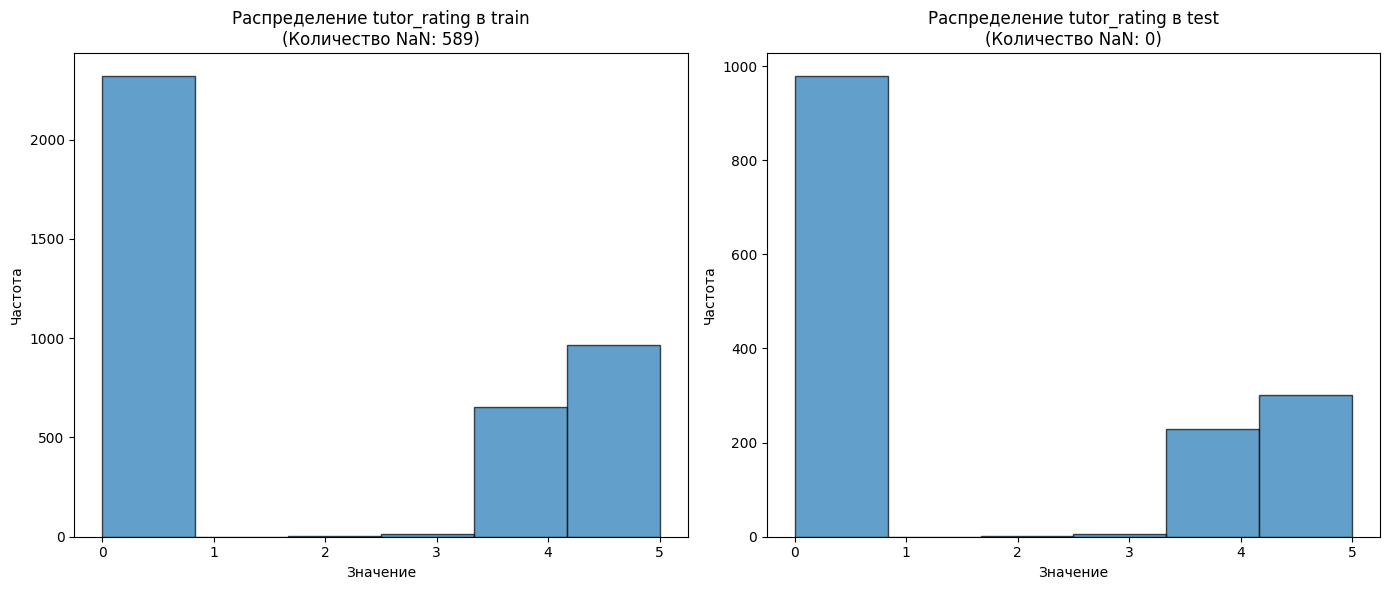

In [42]:
# Столбец для анализа
column = 'tutor_rating'

# Получаем количество NaN значений для train и test
nan_train = datasets["train"][column].isna().sum()
nan_test = datasets["test"][column].isna().sum()

# Создаем фигуру с 2 подграфиками (один для train, другой для test)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма для train
axes[0].hist(datasets["train"][column].dropna(), bins=6, edgecolor='black', alpha=0.7)
axes[0].set_title(f'Распределение {column} в train\n(Количество NaN: {nan_train})')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('Частота')
axes[0].set_xticks([0, 1, 2, 3, 4, 5])  # Уникальные значения для tutor_rating
axes[0].set_xticklabels([0, 1, 2, 3, 4, 5])

# Гистограмма для test
axes[1].hist(datasets["test"][column].dropna(), bins=6, edgecolor='black', alpha=0.7)
axes[1].set_title(f'Распределение {column} в test\n(Количество NaN: {nan_test})')
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('Частота')
axes[1].set_xticks([0, 1, 2, 3, 4, 5])  # Уникальные значения для tutor_rating
axes[1].set_xticklabels([0, 1, 2, 3, 4, 5])

# Отображаем графики
plt.tight_layout()
plt.show()

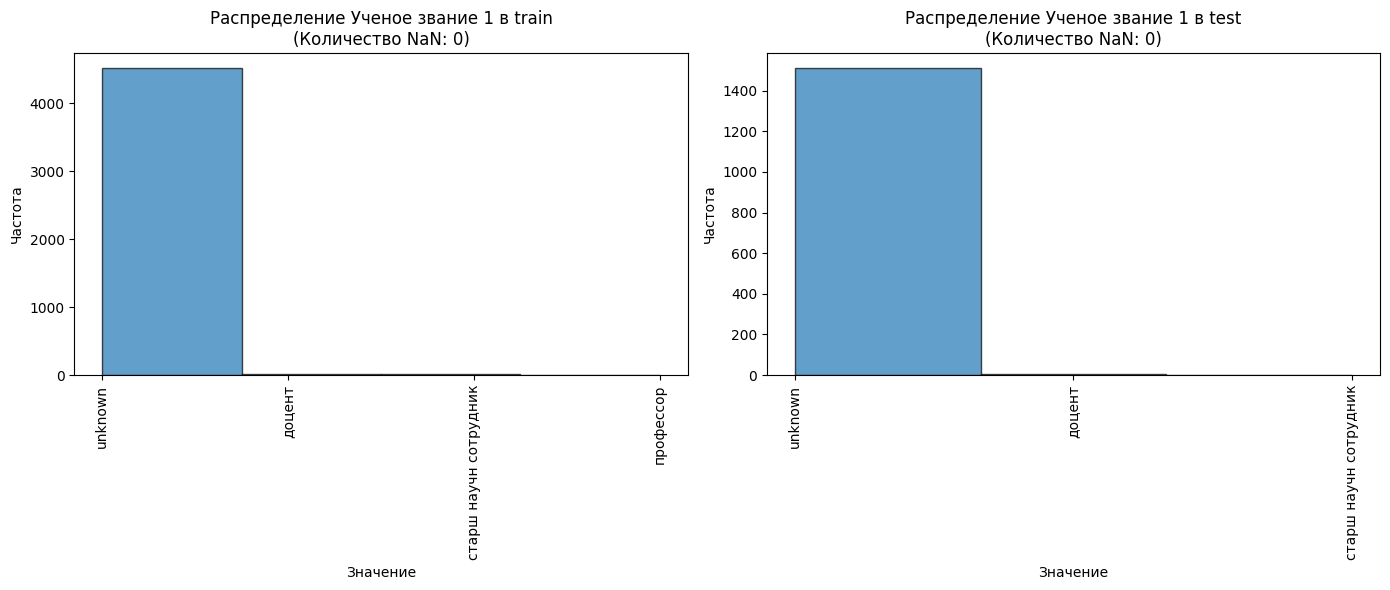

In [43]:
# Столбец для анализа
column = 'Ученое звание 1'

# Получаем количество NaN значений для train и test
nan_train = datasets["train"][column].isna().sum()
nan_test = datasets["test"][column].isna().sum()

# Получаем уникальные значения для train и test
unique_train = datasets["train"][column].value_counts().index
unique_test = datasets["test"][column].value_counts().index

# Создаем фигуру с 2 подграфиками (один для train, другой для test)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма для train
axes[0].hist(datasets["train"][column].dropna(), bins=len(unique_train), edgecolor='black', alpha=0.7)
axes[0].set_title(f'Распределение {column} в train\n(Количество NaN: {nan_train})')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('Частота')
axes[0].set_xticks(range(len(unique_train)))  # Уникальные значения для Ученое звание 1
axes[0].set_xticklabels(unique_train, rotation=90)

# Гистограмма для test
axes[1].hist(datasets["test"][column].dropna(), bins=len(unique_test), edgecolor='black', alpha=0.7)
axes[1].set_title(f'Распределение {column} в test\n(Количество NaN: {nan_test})')
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('Частота')
axes[1].set_xticks(range(len(unique_test)))  # Уникальные значения для Ученое звание 1
axes[1].set_xticklabels(unique_test, rotation=90)

# Отображаем графики
plt.tight_layout()
plt.show()


In [44]:
column = "Ученая степень 1"

# Функция для замены значений
def replace_degree(value):
    if pd.notna(value):  # Проверяем, что значение не NaN
        value = str(value).lower()  # Приводим к строке и нижнему регистру
        if "кандидат" in value:
            return "кандидат"
        elif "доктор" in value:
            return "доктор"
    return value  # Возвращаем исходное значение, если условия не выполнены

# Применяем функцию к train и test
datasets["train"][column] = datasets["train"][column].apply(replace_degree)
datasets["test"][column] = datasets["test"][column].apply(replace_degree)

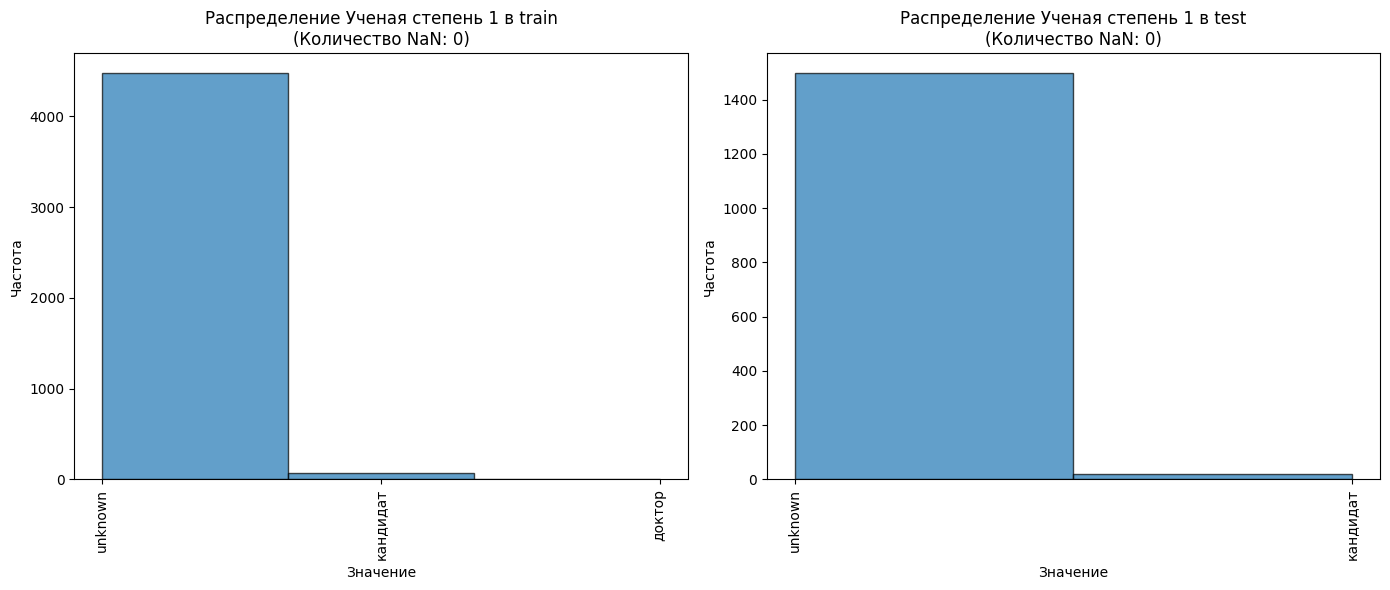

In [45]:
# Столбец для анализа
column = 'Ученая степень 1'

# Получаем количество NaN значений для train и test
nan_train = datasets["train"][column].isna().sum()
nan_test = datasets["test"][column].isna().sum()

# Получаем уникальные значения для train и test
unique_train = datasets["train"][column].value_counts().index
unique_test = datasets["test"][column].value_counts().index

# Создаем фигуру с 2 подграфиками (один для train, другой для test)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма для train
axes[0].hist(datasets["train"][column].dropna(), bins=len(unique_train), edgecolor='black', alpha=0.7)
axes[0].set_title(f'Распределение {column} в train\n(Количество NaN: {nan_train})')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('Частота')
axes[0].set_xticks(range(len(unique_train)))  # Уникальные значения для Ученая степень 1
axes[0].set_xticklabels(unique_train, rotation=90)

# Гистограмма для test
axes[1].hist(datasets["test"][column].dropna(), bins=len(unique_test), edgecolor='black', alpha=0.7)
axes[1].set_title(f'Распределение {column} в test\n(Количество NaN: {nan_test})')
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('Частота')
axes[1].set_xticks(range(len(unique_test)))  # Уникальные значения для Ученая степень 1
axes[1].set_xticklabels(unique_test, rotation=90)

# Отображаем графики
plt.tight_layout()
plt.show()


In [46]:
datasets["test"]['status'] = datasets["test"]['status'].replace(
    'университетск преподавател школьн преподавател аспирант ил ординатор очн форм обучен',
    'университетск преподавател аспирант ил ординатор очн форм обучен'
)

In [47]:
# Подсчитываем количество уникальных значений в train и test
train_status_counts = datasets["train"]['status'].value_counts()
test_status_counts = datasets["test"]['status'].value_counts()

# Выводим результаты
print("Train:")
print(train_status_counts)
print("\nTest:")
print(test_status_counts)

Train:
status
частн преподавател                                                  2345
студент                                                             1288
школьн преподавател                                                  558
университетск преподавател                                           129
частн преподавател студент                                            92
университетск преподавател школьн преподавател                        47
аспирант ил ординатор очн форм обучен                                 45
аспирант ил ординатор очн форм обучен частн преподавател              15
unknown                                                               13
университетск преподавател аспирант ил ординатор очн форм обучен      13
школьн преподавател аспирант ил ординатор очн форм обучен              3
Name: count, dtype: int64

Test:
status
частн преподавател                                                  772
студент                                                             421

In [48]:
# Колонки для Label Encoding
columns_to_encode = ['Ученая степень 1', 'Ученое звание 1', 'предмет', 'status']

# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Для каждого DataFrame (train и test) применяем Label Encoding
for col in columns_to_encode:
    # Применяем LabelEncoder к колонке в train и test
    datasets["train"][col] = label_encoder.fit_transform(datasets["train"][col])
    datasets["test"][col] = label_encoder.transform(datasets["test"][col])  # Используем transform, чтобы избежать утечек данных

# Выводим количество уникальных значений после Label Encoding для каждой колонки
for col in columns_to_encode:
    train_unique = datasets["train"][col].nunique()
    test_unique = datasets["test"][col].nunique()
    print(f"Количество уникальных значений в колонке '{col}' для train: {train_unique}")
    print(f"Количество уникальных значений в колонке '{col}' для test: {test_unique}")

    # Проверяем, есть ли значения в test, которых нет в train
    train_values = set(datasets["train"][col].unique())
    test_values = set(datasets["test"][col].unique())

    missing_in_train = test_values - train_values  # Значения, которые есть в test, но нет в train
    if missing_in_train:
        print(f"Значения в колонке '{col}' из test, которых нет в train: {missing_in_train}")
    else:
        print(f"Все значения из test есть в train для колонки '{col}'")

Количество уникальных значений в колонке 'Ученая степень 1' для train: 3
Количество уникальных значений в колонке 'Ученая степень 1' для test: 2
Все значения из test есть в train для колонки 'Ученая степень 1'
Количество уникальных значений в колонке 'Ученое звание 1' для train: 4
Количество уникальных значений в колонке 'Ученое звание 1' для test: 3
Все значения из test есть в train для колонки 'Ученое звание 1'
Количество уникальных значений в колонке 'предмет' для train: 2
Количество уникальных значений в колонке 'предмет' для test: 2
Все значения из test есть в train для колонки 'предмет'
Количество уникальных значений в колонке 'status' для train: 11
Количество уникальных значений в колонке 'status' для test: 11
Все значения из test есть в train для колонки 'status'


In [49]:
numeric_columns_train = datasets["train"].select_dtypes(include=["number"]).columns
numeric_columns_test = datasets["test"].select_dtypes(include=["number"]).columns

print("Числовые колонки в train:", numeric_columns_train)
print("Числовые колонки в test:", numeric_columns_test)


Числовые колонки в train: Index(['предмет', 'tutor_rating', 'tutor_reviews', 'Ученая степень 1',
       'Ученое звание 1', 'status', 'mean_price', 'год окончания',
       'специальность_код'],
      dtype='object')
Числовые колонки в test: Index(['предмет', 'tutor_rating', 'tutor_reviews', 'Ученая степень 1',
       'Ученое звание 1', 'status', 'Desc_Education_6', 'Education_6',
       'год окончания', 'специальность_код'],
      dtype='object')


In [50]:
# Проверяем, в каких числовых колонках train есть NaN
nan_columns_train = datasets["train"][numeric_columns_train].isna().any()
nan_columns_train = nan_columns_train[nan_columns_train].index.tolist()

# Проверяем, в каких числовых колонках test есть NaN
nan_columns_test = datasets["test"][numeric_columns_test].isna().any()
nan_columns_test = nan_columns_test[nan_columns_test].index.tolist()

print("Колонки с NaN в train:", nan_columns_train)
print("Колонки с NaN в test:", nan_columns_test)


Колонки с NaN в train: ['tutor_rating']
Колонки с NaN в test: ['Desc_Education_6', 'Education_6']


In [52]:
# Получаем список числовых столбцов в обоих датасетах
# Числовые столбцы — это столбцы с типами int или float
numeric_columns_train = datasets["train"].select_dtypes(include=["number"]).columns
numeric_columns_test = datasets["test"].select_dtypes(include=["number"]).columns

# Выводим числовые столбцы для проверки, чтобы убедиться, что они существуют
print("Числовые столбцы в train:", numeric_columns_train.tolist())
print("Числовые столбцы в test:", numeric_columns_test.tolist())

# Проверяем количество пропущенных значений (NaN) в числовых столбцах для train
train_nan_count = datasets["train"][numeric_columns_train].isna().sum()

# Находим столбцы с хотя бы одним NaN в train
cols_with_nan_train = train_nan_count[train_nan_count > 0].index
print("Столбцы с NaN в train:", cols_with_nan_train.tolist())

# Удаляем эти столбцы из обоих датасетов
# Параметр errors='ignore' предотвращает ошибку, если столбец уже отсутствует
datasets["train"] = datasets["train"].drop(columns=cols_with_nan_train, errors='ignore')
datasets["test"] = datasets["test"].drop(columns=cols_with_nan_train, errors='ignore')

# Обновляем список числовых столбцов для обоих датасетов после первого удаления
numeric_columns_train = datasets["train"].select_dtypes(include=["number"]).columns
numeric_columns_test = datasets["test"].select_dtypes(include=["number"]).columns

# Проверяем количество NaN в числовых столбцах для test
test_nan_count = datasets["test"][numeric_columns_test].isna().sum()

# Находим столбцы с хотя бы одним NaN в test
cols_with_nan_test = test_nan_count[test_nan_count > 0].index
print("Столбцы с NaN в test:", cols_with_nan_test.tolist())

# Удаляем эти столбцы из обоих датасетов
datasets["train"] = datasets["train"].drop(columns=cols_with_nan_test, errors='ignore')
datasets["test"] = datasets["test"].drop(columns=cols_with_nan_test, errors='ignore')

# Обновляем список числовых столбцов после второго удаления
numeric_columns_train = datasets["train"].select_dtypes(include=["number"]).columns
numeric_columns_test = datasets["test"].select_dtypes(include=["number"]).columns

# Выводим информацию об удалённых столбцах
print("\nУдалённые столбцы из train и test:")
print(f"Удалены из-за NaN в train: {cols_with_nan_train.tolist()}")
print(f"Удалены из-за NaN в test: {cols_with_nan_test.tolist()}")

# Проверяем, остались ли NaN в числовых столбцах после удаления
train_nan_check = datasets["train"][numeric_columns_train].isna().sum()
test_nan_check = datasets["test"][numeric_columns_test].isna().sum()

# Выводим результаты проверки
print("\nПроверка на NaN после удаления столбцов:")
print("Количество NaN в числовых столбцах для train:")
print(train_nan_check)
print("\nКоличество NaN в числовых столбцах для test:")
print(test_nan_check)

# Проверяем итоговые столбцы в обоих датасетах
print("\nИтоговые столбцы в train:", datasets["train"].columns.tolist())
print("Итоговые столбцы в test:", datasets["test"].columns.tolist())

Числовые столбцы в train: ['предмет', 'tutor_reviews', 'Ученая степень 1', 'Ученое звание 1', 'status', 'mean_price', 'год окончания', 'специальность_код']
Числовые столбцы в test: ['предмет', 'tutor_reviews', 'Ученая степень 1', 'Ученое звание 1', 'status', 'Desc_Education_6', 'Education_6', 'год окончания', 'специальность_код']
Столбцы с NaN в train: []
Столбцы с NaN в test: ['Desc_Education_6', 'Education_6']

Удалённые столбцы из train и test:
Удалены из-за NaN в train: []
Удалены из-за NaN в test: ['Desc_Education_6', 'Education_6']

Проверка на NaN после удаления столбцов:
Количество NaN в числовых столбцах для train:
предмет              0
tutor_reviews        0
Ученая степень 1     0
Ученое звание 1      0
status               0
mean_price           0
год окончания        0
специальность_код    0
dtype: int64

Количество NaN в числовых столбцах для test:
предмет              0
tutor_reviews        0
Ученая степень 1     0
Ученое звание 1      0
status               0
год оконча

In [53]:
# Устанавливаем порог для удаления колонок (80% пропусков)
threshold = 0.7

# Фильтруем колонки в train
missing_fraction_train = datasets["train"].isnull().mean()  # Доля пропущенных значений
cols_to_drop_train = missing_fraction_train[missing_fraction_train > threshold].index  # Выбираем колонки
datasets["train"] = datasets["train"].drop(columns=cols_to_drop_train)  # Удаляем колонки

# Фильтруем колонки в test
missing_fraction_test = datasets["test"].isnull().mean()  # Доля пропущенных значений
cols_to_drop_test = missing_fraction_test[missing_fraction_test > threshold].index  # Выбираем колонки
datasets["test"] = datasets["test"].drop(columns=cols_to_drop_test)  # Удаляем колонки

# Выводим удалённые колонки
print("Удалённые колонки из train:", list(cols_to_drop_train))
print("Удалённые колонки из test:", list(cols_to_drop_test))

Удалённые колонки из train: []
Удалённые колонки из test: []


# Модель перефразирования, генерация перефразированного текста

In [ ]:
from transformers import pipeline
import pandas as pd

# Загружаем модель перефразирования
paraphrase = pipeline("text2text-generation", model="t5-base")

# Функция для перефразирования текста
def generate_paraphrase(text):
    try:
        # Генерация перефразированного текста
        output = paraphrase(f"paraphrase: {text}", max_length=50, num_return_sequences=1)
        return output[0]['generated_text']
    except Exception as e:
        return str(e)  # В случае ошибки возвращаем текст ошибки

# Применяем перефразирование для колонок "description" в обеих таблицах
datasets["train"]["description_paraphrase"] = datasets["train"]["description"].apply(generate_paraphrase)
datasets["test"]["description_paraphrase"] = datasets["test"]["description"].apply(generate_paraphrase)

# Проверяем результат
print(datasets["train"][["description", "description_paraphrase"]].head())
print(datasets["test"][["description", "description_paraphrase"]].head())

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
# Получаем текстовые столбцы в train
text_columns_train = datasets["train"].select_dtypes(include=["object", "string"]).columns

# Получаем текстовые столбцы в test
text_columns_test = datasets["test"].select_dtypes(include=["object", "string"]).columns

# Сравниваем столбцы
if set(text_columns_train) == set(text_columns_test):
    print("Названия текстовых столбцов одинаковые в train и test.")
else:
    print("Названия текстовых столбцов различаются в train и test.")

# Выводим столбцы для проверки
print("Текстовые столбцы в train:", text_columns_train)
print("Текстовые столбцы в test:", text_columns_test)


In [ ]:
# Список текстовых столбцов
text_columns = [
    'tutor_head_tags', 'description', 'experience_desc', 'Education_1', 'Desc_Education_1',
    'Education_2', 'Desc_Education_2', 'Education_3', 'Desc_Education_3', 'Education_4',
    'Desc_Education_4', 'Desc_Education_5', 'Education_5', 'categories'
]

n = 50 #  гиперпараметр
# Объединяем уникальные значения из train и test для каждого текстового столбца
for col in text_columns:
    # Получаем уникальные значения для объединенных train и test данных
    combined_values = pd.concat([dfs["train"][col], datasets["test"][col]], axis=0).unique()

    # Проверяем, что количество уникальных значений не превышает n
    if len(combined_values) <= n:
        # Создаем LabelEncoder и обучаем его на объединенных значениях
        encoder = LabelEncoder()
        encoder.fit(combined_values)

        # Применяем LabelEncoder к данным train и test
        datasets["train"][col] = encoder.transform(datasets["train"][col])
        datasets["test"][col] = encoder.transform(datasets["test"][col])
        print(f"LabelEncoding выполнен для столбца: {col}")
    else:
        print(f"Столбец {col} содержит более {n} уникальных значений, пропущен.")

print("LabelEncoding выполнен для всех подходящих текстовых столбцов.")


In [ ]:
# Список слов для проверки
keywords_group_1 = ["выезд"]
keywords_group_4 = ["дистанцион"]
keywords_group_3 = ["олимпиад"]
keywords_group_2 = ["мфти", "мифи", "мгу", "вшэ", "мгту"]

# Функция для создания значения в колонке 'description_code'
def get_description_code(text):
    # Приводим текст к нижнему регистру
    text = text.lower()

    # Проверка на наличие слов из группы 1 (выезд)
    if any(keyword in text for keyword in keywords_group_1):
        return 1
    # Проверка на наличие слов из группы 2 (мфти, мифи, мгу, вшэ, мгту)
    elif any(keyword in text for keyword in keywords_group_2):
        return 2

   # Проверка на наличие слов из группы 2 (мфти, мифи, мгу, вшэ, мгту)
    elif any(keyword in text for keyword in keywords_group_3):
        return 3
   # Проверка на наличие слов из группы 2 (мфти, мифи, мгу, вшэ, мгту)
    elif any(keyword in text for keyword in keywords_group_4):
        return 4
    # Если нет совпадений
    else:
        return 0

# Применяем функцию к обоим датасетам
datasets["train"]['description_code'] = datasets["train"]['description'].apply(get_description_code)
datasets["test"]['description_code'] = datasets["test"]['description'].apply(get_description_code)

# Выводим количество уникальных значений и их частотность в обеих колонках
print("Частотность значений в колонке 'description_code' для train:")
print(datasets["train"]['description_code'].value_counts())

print("\nЧастотность значений в колонке 'description_code' для test:")
print(datasets["test"]['description_code'].value_counts())

In [ ]:
# Выводим уникальные значения столбца 'description'
unique_values_description = datasets["train"]['tutor_head_tags'].unique()

# Печатаем уникальные значения
print("Уникальные значения в столбце 'tutor_head_tags':")
print(unique_values_description)

In [ ]:
# Объединяем уникальные значения столбца 'tutor_head_tags' из train и test
combined_values = pd.concat([dfs["train"]['tutor_head_tags'], datasets["test"]['tutor_head_tags']], axis=0).unique()

# Функция для присваивания кода на основе содержания текста
def assign_tag_code(tag):
    # Приводим текст к нижнему регистру для удобства поиска
    tag = tag.lower()

    # Условие для присваивания 4 (высокий приоритет)
    if len(re.findall(r'\b[a-zA-Z]+\b', tag)) > 3 or "на английск язык" in tag:
        return 6
    # Условие для присваивания 3
    elif "gmat" in tag:
        return 5
    # Условие для присваивания 3
    elif "уравнен мат физик" in tag:
        return 4

    elif re.search(r'математическ логик|дискретн математик', tag):
        return 3

    # Условие для присваивания 1
    elif re.search(r'линейн алгебр|теор вероятн|дифференциальн уравнен|аналитическ геометр|высш математик', tag):
        return 2

    elif re.search(r'подготовк к олимпиад', tag):
        return 1
    # В остальных случаях присваиваем 0
    else:
        return 0

# Применяем функцию для создания нового столбца в обоих датасетах
datasets["train"]['tutor_head_tags_code'] = datasets["train"]['tutor_head_tags'].apply(assign_tag_code)
datasets["test"]['tutor_head_tags_code'] = datasets["test"]['tutor_head_tags'].apply(assign_tag_code)

# Выводим количество каждого уникального значения в столбце tutor_head_tags_code для train и test
print("\nКоличество уникальных значений в tutor_head_tags_code (Train Data):")
print(datasets["train"]['tutor_head_tags_code'].value_counts())

print("\nКоличество уникальных значений в tutor_head_tags_code (Test Data):")
print(datasets["test"]['tutor_head_tags_code'].value_counts())


In [ ]:
# Выводим уникальные значения в колонке 'description'
unique_descriptions = datasets["train"]["description"].unique()

# Печатаем уникальные значения
print(unique_descriptions)

In [ ]:
# Указанные колонки с текстовыми данными
text_columns = ["специальность"]

# Инициализация HashingVectorizer
vectorizer = HashingVectorizer(n_features=100)
#vectorizer = HashingVectorizer(n_features=100, ngram_range=(1, 2))

# Преобразование колонок
for col in text_columns:
    if col in dfs["train"].columns and col in dfs["test"].columns:
        # Применяем HashingVectorizer
        train_transformed = vectorizer.fit_transform(datasets["train"][col].fillna(""))
        test_transformed = vectorizer.transform(datasets["test"][col].fillna(""))

        # Преобразуем в плотные массивы
        train_array = train_transformed.toarray()
        test_array = test_transformed.toarray()

        # Рассчитываем 4 числовых признака
        # Рассчитываем три числовых признака)
        datasets["train"][f"{col}_mean"] = train_array.mean(axis=1)
        datasets["train"][f"{col}_std"] = train_array.std(axis=1)
        datasets["train"][f"{col}_max"] = train_array.max(axis=1)

        datasets["test"][f"{col}_mean"] = test_array.mean(axis=1)
        datasets["test"][f"{col}_std"] = test_array.std(axis=1)
        datasets["test"][f"{col}_max"] = test_array.max(axis=1)

        # Удаляем исходный текстовый столбец
        datasets["train"].drop(columns=[col], inplace=True)
        datasets["test"].drop(columns=[col], inplace=True)


In [ ]:
non_numerical_columns = dfs["train"].select_dtypes(exclude=["float64", "float32", "int64"]).columns
print(non_numerical_columns)

к колонке "специальность" применяем векторизацию HashingVectorizer по биграммам или монограммам (гиперпараметр)

In [ ]:
# Функция обработки Education_2
def process_education_column(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: 'unknown' if pd.isna(x) else ' '.join(x) if isinstance(x, list) else str(x))
    df[column_name] = df[column_name].str.lower()
    return df

# Обрабатываем оба датафрейма
datasets["train"] = process_education_column(datasets["train"], "Education_2")
datasets["test"] = process_education_column(datasets["test"], "Education_2")

# Векторизация
text_columns = ["Education_2"]
vectorizer = HashingVectorizer(n_features=100)
#vectorizer = HashingVectorizer(n_features=100, ngram_range=(1, 2))

for col in text_columns:
    if col in dfs["train"].columns and col in dfs["test"].columns:
        train_transformed = vectorizer.fit_transform(datasets["train"][col].fillna(""))
        test_transformed = vectorizer.transform(datasets["test"][col].fillna(""))

        train_array = train_transformed.toarray()
        test_array = test_transformed.toarray()

        datasets["train"][f"{col}_mean"] = train_array.mean(axis=1)
        datasets["train"][f"{col}_std"] = train_array.std(axis=1)
        datasets["train"][f"{col}_max"] = train_array.max(axis=1)

        datasets["test"][f"{col}_mean"] = test_array.mean(axis=1)
        datasets["test"][f"{col}_std"] = test_array.std(axis=1)
        datasets["test"][f"{col}_max"] = test_array.max(axis=1)

        datasets["train"].drop(columns=[col], inplace=True)
        datasets["test"].drop(columns=[col], inplace=True)

In [ ]:
# Извлекаем числовые признаки для train и test
numerical_columns_train = datasets["train"].select_dtypes(include=["float64", "float32", "int64"]).columns
numerical_columns_test = datasets["test"].select_dtypes(include=["float64",  "float32", "int64"]).columns

# Сохраняем числовые признаки в CSV файлы
#datasets["train"][numerical_columns_train].to_csv('train_preprocess.csv', index=False)
#datasets["test"][numerical_columns_test].to_csv('test_preprocess.csv', index=False)

Оценка статистической значимости получившихся признаков

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Извлекаем числовые признаки
numerical_columns = datasets["train"].select_dtypes(include=["float64", "float32", "int64"]).columns

# Удаляем 'mean_price' из списка признаков (целевая переменная)
numerical_columns = numerical_columns[numerical_columns != 'mean_price']
numerical_columns = numerical_columns[numerical_columns != "text_model_pred"]

# Извлекаем целевую переменную (mean_price)
X_train = datasets["train"][numerical_columns]
y_train = datasets["train"]["mean_price"]

# Используем mutual_info_regression для регрессии
importances = mutual_info_regression(X_train, y_train)

# Сортируем и отображаем важность признаков
feature_importances = pd.Series(importances, X_train.columns)
feature_importances = feature_importances.sort_values()

# Строим график
plt.figure(figsize=(10,10))
ax = feature_importances.plot(kind='barh')

# Добавляем заголовок
plt.title('Значимость признаков')

# Добавляем сетку
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем значения на график
for index, value in enumerate(feature_importances):
    ax.text(value, index, f'{value:.4f}', va='center', ha='left', fontsize=10)

# Показываем график
plt.show()

In [ ]:
# Добавляем целевую переменную 'mean_price' в X_train
X_train_with_target = X_train.copy()
X_train_with_target['mean_price'] = y_train

# Вычисляем матрицу корреляции для всех признаков, включая целевую переменную
correlation_matrix_with_target = X_train_with_target.corr()

# Отображаем матрицу в виде тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_with_target, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Добавляем заголовок
plt.title("Correlation Matrix with Target Variable 'mean_price'")

# Показываем график
plt.show()

# Обучение модели

получившиеся числовые признаки принимаем за основные **(numerical_columns_train_base)** и на них обучаем базовую модель
на этих признаках получена **MSE 0,69**
многие гиперпараметры перебиральсь в ручную
пробовалось несколько моделей
пробовались разные модели, в том числе простые нейронные сети (**MLPRegressor**)
лучшие значения получились для модели XGBooster

In [ ]:
# Сохраняем список всех числовых колонок в dfs["train"] и dfs["test"]
numerical_columns_train_base = datasets["train"].select_dtypes(include=["float64", "float32", "int64"]).columns.tolist()
numerical_columns_test_base = datasets["test"].select_dtypes(include=["float64", "float32", "int64"]).columns.tolist()

# Печать списка числовых колонок
print("Числовые колонки в train:", numerical_columns_train_base)
print("Числовые колонки в test:", numerical_columns_test_base)

# Найдем различия между числовыми колонками в train и test
set_train = set(numerical_columns_train)
set_test = set(numerical_columns_test)

# Колонки, которые есть в train, но нет в test
train_only = set_train - set_test

# Колонки, которые есть в test, но нет в train
test_only = set_test - set_train

# Выводим результаты
print("Колонки, которые есть в train, но нет в test:", train_only)
print("Колонки, которые есть в test, но нет в train:", test_only)

In [ ]:
# Функция обработки текстовых колонок
def process_text_column(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: 'unknown' if pd.isna(x) else ' '.join(x) if isinstance(x, list) else str(x))
    df[column_name] = df[column_name].str.lower()
    return df

# Список текстовых колонок
text_columns = ['description', "description_paraphrase", 'experience_desc', 'Education_1', 'Desc_Education_1', 'Desc_Education_2',
                'Education_3', 'Desc_Education_3', 'categories', 'факультет']

# Параметры для HashingVectorizer
vectorizer = HashingVectorizer(n_features=100, ngram_range=(1, 2))  # Для биграмм (1, 2) или триграмм (1, 3)

# Список новых колонок
new_feature_names = []

# Обрабатываем и векторизуем каждую колонку
for col in text_columns:
    if col in datasets["train"].columns and col in datasets["test"].columns:
        datasets["train"] = process_text_column(datasets["train"], col)
        datasets["test"] = process_text_column(datasets["test"], col)

        # Векторизация текста (с использованием n-грамм)
        train_transformed = vectorizer.fit_transform(datasets["train"][col].fillna(""))
        test_transformed = vectorizer.transform(datasets["test"][col].fillna(""))

        train_array = train_transformed.toarray()
        test_array = test_transformed.toarray()

        # Вычисление статистик по строкам для n-грамм
        for stat in ["mean", "std", "max", "median"]:
            if stat == "mean":
                train_stat = np.mean(train_array, axis=1)
                test_stat = np.mean(test_array, axis=1)
            elif stat == "std":
                train_stat = np.std(train_array, axis=1)
                test_stat = np.std(test_array, axis=1)
            elif stat == "max":
                train_stat = np.max(train_array, axis=1)
                test_stat = np.max(test_array, axis=1)
            elif stat == "median":
                train_stat = np.median(train_array, axis=1)
                test_stat = np.median(test_array, axis=1)

            train_col_name = f"{col}_{stat}_ngram"
            test_col_name = f"{col}_{stat}_ngram"

            datasets["train"][train_col_name] = train_stat
            datasets["test"][test_col_name] = test_stat

            new_feature_names.append(train_col_name)

        # Удаляем исходные текстовые колонки
        datasets["train"].drop(columns=[col], inplace=True)
        datasets["test"].drop(columns=[col], inplace=True)

print("Созданы новые признаки:", new_feature_names)


In [ ]:
Обучение модели XGBRegressor на основных признаках и потом добавляем по одному прризнаку из дополнительных и смотрим приводит ли это к удучшению метрики R2
отбираем только те дополнительные признаки которые приводят к улучшению метрики R2
получаем окончательный набор признаков для обучения
проводим fine tuning модоели (GreadSearch)

In [ ]:
# Извлекаем числовые признаки
numerical_columns = datasets["train"].select_dtypes(include=["float64", "float32", "int64"]).columns

# Удаляем 'mean_price' из списка признаков (целевая переменная)
numerical_columns = numerical_columns[numerical_columns != 'mean_price']
numerical_columns = numerical_columns[numerical_columns != "text_model_pred"]

# Извлекаем целевую переменную (mean_price)
X = datasets["train"][numerical_columns]
y = datasets["train"]["mean_price"]
# Извлекаем числовые признаки из numerical_columns_test_base
X_train = datasets["train"][numerical_columns_test_base]  # Признаки
y_train = datasets["train"]["mean_price"]  # Целевая переменная

# Создаем KFold для кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Изначальная модель с базовыми признаками
xgb = XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=100, learning_rate=0.05)

# Функция для выполнения K-Fold кросс-валидации с метрикой R2
def get_kfold_r2(X, y, model, kf):
    r2_scores = []
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_pred)
        r2_scores.append(r2)

    return sum(r2_scores) / len(r2_scores)

# Оценка R2 на базовых признаках
base_r2 = get_kfold_r2(X_train, y_train, xgb, kf)
print("Начальное R2 на обучающих данных:", base_r2)

# Начинаем с базовых признаков
best_features = list(numerical_columns_test_base)
best_r2 = base_r2
added_features = []

# Добавляем признаки из new_feature_names и проверяем улучшение R2
for feature in new_feature_names:
    # Проверяем, что признак присутствует в DataFrame
    if feature in X.columns:
        # Добавляем новый признак
        new_features = best_features + [feature]

        # Обучаем модель с новым набором признаков
        r2_new = get_kfold_r2(X[new_features], y, xgb, kf)

        # Если R2 улучшилось, добавляем признак
        if r2_new > best_r2:
            best_r2 = r2_new
            best_features.append(feature)
            added_features.append(feature)  # Добавляем в список добавленных признаков
            print(f"Добавлен признак: {feature}, новое R2 = {best_r2}")
        else:
            print(f"Признак {feature} не улучшил R2, не добавляем его")
    else:
        print(f"Признак {feature} отсутствует в DataFrame, пропускаем его")

# Окончательные признаки
final_features = best_features
print("Окончательные признаки, на которых обучена модель:", final_features)
print("Лучшее R2 после добавления признаков:", best_r2)

# Выводим список добавленных признаков
print("Добавленные признаки:", added_features)


обучаем модель на отобранных признаках на 100% данных
добавляем гиперпараметр threshold для возможности откидывать не значимые признаки
предсказываем целевую переменную для тестовой выборки
сохраняем в файл

In [ ]:
# Извлекаем числовые признаки
numerical_columns = dfs["train"].select_dtypes(include=["float64", "float32", "int64"]).columns

# Удаляем 'mean_price' из списка признаков (целевая переменная)
numerical_columns = numerical_columns[numerical_columns != 'mean_price']
numerical_columns = numerical_columns[numerical_columns != "text_model_pred"]

# Извлекаем целевую переменную (mean_price)
X_train = datasets["train"][numerical_columns]
y_train = datasets["train"]["mean_price"]

# Обучаем модель случайного леса для оценки важности признаков
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Выбираем наиболее важные признаки с помощью SelectFromModel
sfm = SelectFromModel(rf, threshold=0.001)  # Отбираем признаки с важностью > 0.005
X_train_selected = sfm.transform(X_train)

# Создаем новый скейлер и обучаем его ТОЛЬКО на отобранных признаках
scaler_selected = StandardScaler()
X_train_scaled_selected = scaler_selected.fit_transform(X_train_selected)

#xgb = XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=100, learning_rate=0.05)
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0,
    n_estimators=300,
    max_depth=10,
    learning_rate=0.01,
    colsample_bytree=0.6
)

xgb.fit(X_train_scaled_selected, y_train)

# Применяем отбор признаков к тестовым данным
X_test = datasets["test"][numerical_columns]
X_test_selected = sfm.transform(X_test)

# Масштабируем тестовые данные с тем же скейлером, что и для отобранных признаков
X_test_scaled_selected = scaler_selected.transform(X_test_selected)

# Делаем предсказания
y_pred = xgb.predict(X_test_scaled_selected)


submission = pd.DataFrame({
    "index": datasets["test"].index,  # Используем индекс строк как id
    "mean_price": y_pred
})

# Сохраняем в файл
submission.to_csv("submission.csv", index=False)

print("Результаты сохранены в файл 'submission.csv'")
